# Intro

This will be an example of data analysis & Machine Learning on data of data Scientist jobs from the website glassdoor.

This will be seperated into chapters where various transformations and various other methods will be applied/used;

**[Chapter 1](#Chapter-1)** = Web Scraping / Data Gathering

**[Chapter 2](#Chapter-2)** = Data cleansing

**[Chapter 3](#Chapter-3)** = EDA

**[Chapter 4](#Chapter-4)** = Feature engineering

**[Chapter 5](#Chapter-5)** = Model Training

**[Chapter 6](#Chapter-6)** = Using a pretrained spacy transformer

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import clear_output
from driver import make_driver
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import matplotlib.pyplot as plt
import time
import urllib.parse

# Chapter 1
<a id='Chapter-1'></a>

### Web Scraping / Data Gathering

---------------------------------------------------------------------------------

In [5]:
def get_jobs(keyword, num_jobs, verbose, slp_time, save=False):
    
    '''Gathers jobs as a dataframe, scraped from Glassdoor'''
    
    driver = make_driver()
    keywordencoded = urllib.parse.quote(keyword)
    url=f"https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword={keywordencoded}&sc.keyword={keywordencoded}&jobType="
    display(url)

    driver.get(url)
    jobs = []

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        time.sleep(slp_time)
        
        #Going through each job in this page
        job_buttons = driver.find_elements_by_class_name("react-job-listing") 
        try:
            driver.find_element_by_xpath('//*[@id="onetrust-accept-btn-handler"]').click()
        except:
            pass
        for job_button in job_buttons:  
                
            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))

            if len(jobs) >= num_jobs:
                break
  
            job_button.click() 
     
            time.sleep(1)
    
            collected_successfully = False
 
            try:
                driver.find_element_by_css_selector('[alt="Close"]').click()
            except NoSuchElementException:
                pass
            
            while not collected_successfully:

                try:
                    company_name = driver.find_element_by_xpath('.//div[@class="css-xuk5ye e1tk4kwz5"]').text
                    location = driver.find_element_by_xpath('.//div[@class="css-56kyx5 e1tk4kwz1"]').text
                    job_title = driver.find_element_by_xpath('.//div[contains(@class, "css-1j389vi e1tk4kwz2")]').text
                    job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True
                    
                except:
                    time.sleep(5)

            try:
                salary_estimate = driver.find_element_by_xpath('.//span[@class="css-1hbqxax e1wijj240"]').text
            except NoSuchElementException:
                salary_estimate = -1

            try:
                rating = driver.find_element_by_xpath('.//span[@class="css-1m5m32b e1tk4kwz4"]').text
            except NoSuchElementException:
                rating = -1

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            try:
                size = driver.find_element_by_xpath('//*[@id="EmpBasicInfo"]/div[1]/div/div[1]/span[2]').text
            except NoSuchElementException:
                size = -1

            try:
                founded = driver.find_element_by_xpath('//*[@id="EmpBasicInfo"]/div[1]/div/div[2]/span[2]').text
            except NoSuchElementException:
                founded = -1

            try:
                type_of_ownership = driver.find_element_by_xpath('//*[@id="EmpBasicInfo"]/div[1]/div/div[3]/span[2]').text
            except NoSuchElementException:
                type_of_ownership = -1

            try:
                industry = driver.find_element_by_xpath('//*[@id="EmpBasicInfo"]/div[1]/div/div[4]/span[2]').text
            except NoSuchElementException:
                industry = -1

            try:
                sector = driver.find_element_by_xpath('//*[@id="EmpBasicInfo"]/div[1]/div/div[5]/span[2]').text
            except NoSuchElementException:
                sector = -1

            try:
                revenue = driver.find_element_by_xpath('//*[@id="EmpBasicInfo"]/div[1]/div/div[6]/span[2]').text
            except NoSuchElementException:
                revenue = -1


                
            if verbose:
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue})
            
            if verbose:
                time.sleep(2)
                clear_output(wait=True)
            else:
                clear_output(wait=True)
            
        #Clicking on the "next page" button
        try:
            driver.find_element_by_xpath('/html/body/div[3]/div/div/div[1]/div/div[2]/section/article/div[2]/div/div[1]/button[7]').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break
        
        
    data = pd.DataFrame(jobs)
    date = pd.to_datetime("today").date().strftime("%d_%m_%y")
    if save:
        data.to_csv(f"{keyword}_job_data_{date}.csv")
    return data

In [6]:
df = get_jobs("project engineer", 100, True , 5, True)

Progress: 11/100


KeyboardInterrupt: 

In [36]:
date = pd.to_datetime("today").date().strftime("%d_%m_%y")
df.to_csv(f"job_data_{date}.csv")

In [139]:
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Job Location
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,NM
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,MD
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,FL
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,WA
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,MA
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,TN
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,PA
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",Jan-50,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,PA


# Chapter 2
<a id='Chapter-2'></a>

### Data cleansing / Feature engineering

---------------------------------------------------------------------------------

In [31]:
df = pd.concat([pd.read_csv(file) for file in os.listdir(os.getcwd()) if file.endswith("csv")])
df = df.drop("Unnamed: 0", axis=1)
df = df.reset_index()
df = df.drop("index", axis=1)

In [32]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Analyst,-1,Do you have a Passion to Win? Not afraid to Ro...,3.1,Class Valuation\n3.1,Remote,51 to 200 Employees,2009,Company - Private,Real Estate,Real Estate,Unknown / Non-Applicable
1,Data Optimization Analyst,$55K - $98K (Glassdoor est.),Spokeo is a people search engine that both enl...,4.2,Spokeo\n4.2,"Pasadena, CA",201 to 500 Employees,2006,Company - Private,Internet & Web Services,Information Technology,Unknown / Non-Applicable
2,"Analyst, Data and Analysis",$54K - $95K (Glassdoor est.),Company Description\n\nDigitas is the Connecte...,3.9,Digitas\n3.9,"Detroit, MI",5001 to 10000 Employees,1980,Subsidiary or Business Segment,Advertising & Public Relations,Media & Communication,Unknown / Non-Applicable
3,Data Analyst,Employer Provided Salary:$70 Per Hour,This Data Analyst position is to work with Bus...,4.2,Devcare Solutions\n4.2,Remote,51 to 200 Employees,2005,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
4,Data Analyst,Employer Provided Salary:$75K - $85K,Responsibilities\nGather client requirements f...,-1.0,BeSpokean LLC,Remote,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
1895,Data Scientist,$36K - $74K (Glassdoor est.),Job Title\nData Scientist\nRelevant Experience...,-1.0,Pyramid Global Technologies,"Redmond, WA",-1,-1,-1,-1,-1,-1
1896,Data Scientist,$36K - $74K (Glassdoor est.),About ClosedLoop:\nClosedLoop.ai is healthcare...,4.8,ClosedLoop\n4.8,"Austin, TX",-1,-1,-1,-1,-1,-1
1897,"Data Scientist, Content Analytics, Podcasts & ...",$36K - $74K (Glassdoor est.),"Data, Research & Insights\nData Science\nSpoti...",4.2,Spotify\n4.2,"New York, NY",-1,-1,-1,-1,-1,-1
1898,Data Scientist,$36K - $74K (Glassdoor est.),At MarketDial we equip our clients with the ea...,5.0,MarketDial\n5.0,"Salt Lake City, UT",-1,-1,-1,-1,-1,-1


In [33]:
df["Salary Estimate"] = df["Salary Estimate"].astype("str")

In [34]:
### Currently Salary Estimate column is in text format, we need to transform it into numbers

# Quick check to see if any of the values are null
display(df[pd.isnull(df["Salary Estimate"])])

# Quick check to see if any of the values are ""
display(df[df["Salary Estimate"] == ""])

# drop values which are -1 as these are values which couldnt be scraped
df = df.drop(df.loc[df["Salary Estimate"] == "-1"].index, axis=0)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue


In [35]:
# now that we know we have values for each cell we can now decide how we are going to clean it
# so far it seems like all of them contain brackets () with text inside let s check

display(df["Salary Estimate"].str.contains('(', case=False, regex=False).value_counts())

True     1851
False      38
Name: Salary Estimate, dtype: int64

In [36]:
# Let's check the salaries which do not contain brackets and deal with them seperately

display(df[df["Salary Estimate"].str.contains('(', case=False, regex=False) == False])

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
3,Data Analyst,Employer Provided Salary:$70 Per Hour,This Data Analyst position is to work with Bus...,4.2,Devcare Solutions\n4.2,Remote,51 to 200 Employees,2005,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
4,Data Analyst,Employer Provided Salary:$75K - $85K,Responsibilities\nGather client requirements f...,-1.0,BeSpokean LLC,Remote,-1,-1,-1,-1,-1,-1
5,Data Assistant / Jr Data Analyst - REMOTE,Employer Provided Salary:$22 - $28 Per Hour,Job Title\nData Assistant / Jr Data Analyst - ...,3.7,InBody\n3.7,Remote,201 to 500 Employees,1996,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,Unknown / Non-Applicable
6,Data Analyst,Employer Provided Salary:$80 Per Hour,Data Management Analyst.\nData Management Anal...,-1.0,Go Intellects Inc,"Washington, DC",-1,-1,-1,-1,-1,-1
8,Data Analyst,Employer Provided Salary:$54K - $104K,We are looking for presentation-centric data a...,3.0,"Data443 Risk Mitigation, Inc.\n3.0","Morrisville, NC",1 to 50 Employees,2017,Company - Public,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
9,Program Analyst (Data Analytics),Employer Provided Salary:$107K - $139K,Help\nThis job is open to\nCareer transition (...,2.7,US Administration for Children and Families\n2.7,"Washington, DC",5001 to 10000 Employees,Government,National Agencies,Government & Public Administration,Unknown / Non-Applicable,-1
12,Data Analyst,Employer Provided Salary:$47K - $75K,We are looking for a passionate certified Data...,-1.0,Loewe Tech Software,Remote,-1,-1,-1,-1,-1,-1
13,Data Analyst,Employer Provided Salary:$47K - $75K,We are looking for a passionate certified Data...,-1.0,Loewe Tech Software,Remote,-1,-1,-1,-1,-1,-1
14,Data Analyst,Employer Provided Salary:$47K - $75K,We are looking for a passionate certified Data...,-1.0,Loewe Tech Software,Remote,-1,-1,-1,-1,-1,-1
15,Data Analyst,Employer Provided Salary:$47K - $75K,We are looking for a passionate certified Data...,-1.0,Loewe Tech Software,Remote,-1,-1,-1,-1,-1,-1


In [37]:
# Lets get rid of the "$" now before it screws us over

df["Salary Estimate"] = df["Salary Estimate"].str.replace("$", "", regex=False)

In [38]:
# We can see the outliers have a different pattern we can exploit
# We will split at the ":" for these outliers

outliers = df.loc[df["Salary Estimate"].str.contains('(', case=False, regex=False) == False].index
df.loc[df["Salary Estimate"].str.contains('(', case=False, regex=False) == False, "Salary Estimate"] = df.loc[df["Salary Estimate"].str.contains('(', case=False, regex=False) == False, "Salary Estimate"].str.split(":", expand=True)[1]

In [39]:
# For all the non-outliers we shall split at the "(" and then strip out the extra spaces

standard = df.loc[df["Salary Estimate"].str.contains('(', case=False, regex=False)]
df.loc[df["Salary Estimate"].str.contains('(', case=False, regex=False), "Salary Estimate"] = df.loc[df["Salary Estimate"].str.contains('(', case=False, regex=False), "Salary Estimate"].str.split("(", expand=True)[0].str.strip()

In [40]:
# From our previous checks we saw that some values were listed as per hour, we need to cleanse these aswel, lets quick check if there is anything else we need to take care of

tocheck = df.loc[df["Salary Estimate"].str.contains('Per Hour', case=False, regex=False)].index
df.loc[df["Salary Estimate"].str.contains('Per Hour', case=False, regex=False)]


# As we can see the only salaries we need to clanse that are left are the per hour ones and a few straglers from previous 

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
3,Data Analyst,70 Per Hour,This Data Analyst position is to work with Bus...,4.2,Devcare Solutions\n4.2,Remote,51 to 200 Employees,2005,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
5,Data Assistant / Jr Data Analyst - REMOTE,22 - 28 Per Hour,Job Title\nData Assistant / Jr Data Analyst - ...,3.7,InBody\n3.7,Remote,201 to 500 Employees,1996,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,Unknown / Non-Applicable
6,Data Analyst,80 Per Hour,Data Management Analyst.\nData Management Anal...,-1.0,Go Intellects Inc,"Washington, DC",-1,-1,-1,-1,-1,-1
30,Entry Level Data Analyst,27 - 30 Per Hour,We are seeking an Entry level Data Analyst to ...,-1.0,TRESUME,"Arlington, VA",Unknown,Company - Public,Unknown / Non-Applicable,-1,-1,-1
31,E-Commerce Data Analyst,27 - 30 Per Hour,HANRO stands for Pure Luxury on Skin for over ...,-1.0,HANRO,"Eatontown, NJ",-1,-1,-1,-1,-1,-1
32,Data Analyst,27 - 30 Per Hour,This job is available for fully remote work.\n...,4.4,B.well Connected Health\n4.4,"Austin, TX",51 to 200 Employees,2015,Company - Private,Health Care Services & Hospitals,Healthcare,Unknown / Non-Applicable
33,Data Analyst,27 - 30 Per Hour,!!! Temporary 12+ months contract\nAcara solut...,3.8,Acara Solutions\n3.8,"San Diego, CA",10000+ Employees,1957,Company - Private,HR Consulting,Human Resources & Staffing,Unknown / Non-Applicable
34,DATA ANALYST - US,27 - 30 Per Hour,"Luminex, a DiaSorin Company is seeking dedicat...",3.5,Luminex\n3.5,"Northbrook, IL",1001 to 5000 Employees,1995,Company - Private,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$100 to $500 million (USD)
35,Data Analyst,27 - 30 Per Hour,PerBlue is looking for our next great aspiring...,4.1,PerBlue\n4.1,"Madison, WI",1 to 50 Employees,2010,Company - Private,Video Game Publishing,Media & Communication,Unknown / Non-Applicable
36,Data Analyst,27 - 30 Per Hour,"Title: Sr. Data Analyst\nLocation : Bothell , ...",3.9,Equinox IT Solutions LLC\n3.9,"Bothell, WA",1 to 50 Employees,2009,Company - Private,Information Technology Support Services,Information Technology,$1 to $5 million (USD)


In [41]:
df.loc[df["Salary Estimate"].str.contains('', case=False, regex=False)]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
1,Data Optimization Analyst,55K - 98K,Spokeo is a people search engine that both enl...,4.2,Spokeo\n4.2,"Pasadena, CA",201 to 500 Employees,2006,Company - Private,Internet & Web Services,Information Technology,Unknown / Non-Applicable
2,"Analyst, Data and Analysis",54K - 95K,Company Description\n\nDigitas is the Connecte...,3.9,Digitas\n3.9,"Detroit, MI",5001 to 10000 Employees,1980,Subsidiary or Business Segment,Advertising & Public Relations,Media & Communication,Unknown / Non-Applicable
3,Data Analyst,70 Per Hour,This Data Analyst position is to work with Bus...,4.2,Devcare Solutions\n4.2,Remote,51 to 200 Employees,2005,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
4,Data Analyst,75K - 85K,Responsibilities\nGather client requirements f...,-1.0,BeSpokean LLC,Remote,-1,-1,-1,-1,-1,-1
5,Data Assistant / Jr Data Analyst - REMOTE,22 - 28 Per Hour,Job Title\nData Assistant / Jr Data Analyst - ...,3.7,InBody\n3.7,Remote,201 to 500 Employees,1996,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...
1895,Data Scientist,36K - 74K,Job Title\nData Scientist\nRelevant Experience...,-1.0,Pyramid Global Technologies,"Redmond, WA",-1,-1,-1,-1,-1,-1
1896,Data Scientist,36K - 74K,About ClosedLoop:\nClosedLoop.ai is healthcare...,4.8,ClosedLoop\n4.8,"Austin, TX",-1,-1,-1,-1,-1,-1
1897,"Data Scientist, Content Analytics, Podcasts & ...",36K - 74K,"Data, Research & Insights\nData Science\nSpoti...",4.2,Spotify\n4.2,"New York, NY",-1,-1,-1,-1,-1,-1
1898,Data Scientist,36K - 74K,At MarketDial we equip our clients with the ea...,5.0,MarketDial\n5.0,"Salt Lake City, UT",-1,-1,-1,-1,-1,-1


In [42]:
# For these we will assume the standard 9 - 5 daily, with 30 days off (to account for annual leave and days that are not workable) so thats 261 working days - 30 holidays = 231
# 231 days * 8 hours = 1848 working hours 

# split our lower bound and upper bound and cleanse

LowerBound = pd.to_numeric(df.loc[df["Salary Estimate"].str.contains('Per Hour', case=False, regex=False), "Salary Estimate"].str.split("-", expand=True)[0].str.replace("$", "", regex=False), errors='coerce')
UpperBound = pd.to_numeric(df.loc[df["Salary Estimate"].str.contains('Per Hour', case=False, regex=False), "Salary Estimate"].str.split("-", expand=True)[1].str.strip().str.split(" ", expand=True)[0].str.replace("$", "", regex=False), errors='coerce')

In [43]:
LowerBound = LowerBound * 1848
UpperBound = UpperBound * 1848

In [44]:
df.loc[df["Salary Estimate"].str.contains('Per Hour', case=False, regex=False), "Salary Estimate"] = LowerBound.astype("string").str.cat(UpperBound.astype("string"), sep="-")

In [45]:
# fixed per hour

display(df.loc[tocheck])

# let's check the rest of the outliers

display(df.loc[outliers])

# drop na's

df = df.drop(df.loc[pd.isnull(df["Salary Estimate"])].index, axis=0)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
3,Data Analyst,<NA>,This Data Analyst position is to work with Bus...,4.2,Devcare Solutions\n4.2,Remote,51 to 200 Employees,2005,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
5,Data Assistant / Jr Data Analyst - REMOTE,40656.0-51744.0,Job Title\nData Assistant / Jr Data Analyst - ...,3.7,InBody\n3.7,Remote,201 to 500 Employees,1996,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,Unknown / Non-Applicable
6,Data Analyst,<NA>,Data Management Analyst.\nData Management Anal...,-1.0,Go Intellects Inc,"Washington, DC",-1,-1,-1,-1,-1,-1
30,Entry Level Data Analyst,49896.0-55440.0,We are seeking an Entry level Data Analyst to ...,-1.0,TRESUME,"Arlington, VA",Unknown,Company - Public,Unknown / Non-Applicable,-1,-1,-1
31,E-Commerce Data Analyst,49896.0-55440.0,HANRO stands for Pure Luxury on Skin for over ...,-1.0,HANRO,"Eatontown, NJ",-1,-1,-1,-1,-1,-1
32,Data Analyst,49896.0-55440.0,This job is available for fully remote work.\n...,4.4,B.well Connected Health\n4.4,"Austin, TX",51 to 200 Employees,2015,Company - Private,Health Care Services & Hospitals,Healthcare,Unknown / Non-Applicable
33,Data Analyst,49896.0-55440.0,!!! Temporary 12+ months contract\nAcara solut...,3.8,Acara Solutions\n3.8,"San Diego, CA",10000+ Employees,1957,Company - Private,HR Consulting,Human Resources & Staffing,Unknown / Non-Applicable
34,DATA ANALYST - US,49896.0-55440.0,"Luminex, a DiaSorin Company is seeking dedicat...",3.5,Luminex\n3.5,"Northbrook, IL",1001 to 5000 Employees,1995,Company - Private,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$100 to $500 million (USD)
35,Data Analyst,49896.0-55440.0,PerBlue is looking for our next great aspiring...,4.1,PerBlue\n4.1,"Madison, WI",1 to 50 Employees,2010,Company - Private,Video Game Publishing,Media & Communication,Unknown / Non-Applicable
36,Data Analyst,49896.0-55440.0,"Title: Sr. Data Analyst\nLocation : Bothell , ...",3.9,Equinox IT Solutions LLC\n3.9,"Bothell, WA",1 to 50 Employees,2009,Company - Private,Information Technology Support Services,Information Technology,$1 to $5 million (USD)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
3,Data Analyst,<NA>,This Data Analyst position is to work with Bus...,4.2,Devcare Solutions\n4.2,Remote,51 to 200 Employees,2005,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
4,Data Analyst,75K - 85K,Responsibilities\nGather client requirements f...,-1.0,BeSpokean LLC,Remote,-1,-1,-1,-1,-1,-1
5,Data Assistant / Jr Data Analyst - REMOTE,40656.0-51744.0,Job Title\nData Assistant / Jr Data Analyst - ...,3.7,InBody\n3.7,Remote,201 to 500 Employees,1996,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,Unknown / Non-Applicable
6,Data Analyst,<NA>,Data Management Analyst.\nData Management Anal...,-1.0,Go Intellects Inc,"Washington, DC",-1,-1,-1,-1,-1,-1
8,Data Analyst,54K - 104K,We are looking for presentation-centric data a...,3.0,"Data443 Risk Mitigation, Inc.\n3.0","Morrisville, NC",1 to 50 Employees,2017,Company - Public,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
9,Program Analyst (Data Analytics),107K - 139K,Help\nThis job is open to\nCareer transition (...,2.7,US Administration for Children and Families\n2.7,"Washington, DC",5001 to 10000 Employees,Government,National Agencies,Government & Public Administration,Unknown / Non-Applicable,-1
12,Data Analyst,47K - 75K,We are looking for a passionate certified Data...,-1.0,Loewe Tech Software,Remote,-1,-1,-1,-1,-1,-1
13,Data Analyst,47K - 75K,We are looking for a passionate certified Data...,-1.0,Loewe Tech Software,Remote,-1,-1,-1,-1,-1,-1
14,Data Analyst,47K - 75K,We are looking for a passionate certified Data...,-1.0,Loewe Tech Software,Remote,-1,-1,-1,-1,-1,-1
15,Data Analyst,47K - 75K,We are looking for a passionate certified Data...,-1.0,Loewe Tech Software,Remote,-1,-1,-1,-1,-1,-1


In [46]:
# Converting K into 000's

df.loc[df["Salary Estimate"].str.contains("K"), "Salary Estimate"] = df.loc[df["Salary Estimate"].str.contains("K"), "Salary Estimate"].str.replace("K", "000", regex=False).str.replace("$", "", regex=False)

In [47]:
# Now to split Salary into's lower and upper bound and the convert to a number
# TO NOTE: we coerced the values so where pandas couldnt convert it became NaN's which we cgot rid of

df[["Lower Bound Salary", "Upper Bound Salary"]] = df["Salary Estimate"].str.split("-", expand=True)
df["Lower Bound Salary"] = pd.to_numeric(df["Lower Bound Salary"])
df["Upper Bound Salary"] = pd.to_numeric(df["Upper Bound Salary"])
df = df.drop("Salary Estimate", axis=1)

In [48]:
# Fill the ones which dont have ranges with their lower bound, means when we get the average of the range we will get the actual salary

df.loc[pd.isnull(df["Upper Bound Salary"]), "Upper Bound Salary"] = df.loc[pd.isnull(df["Upper Bound Salary"]), "Lower Bound Salary"]

In [49]:
# Now we are going to pay attention to the founded column, it is better to change it to the age of the company whcih is more relevant for what we are trying to accomplish

display(df["Founded"].describe())

count     1886
unique      31
top         -1
freq      1794
Name: Founded, dtype: int64

In [50]:
# We can see that some values are marked as -1, we can assume these are rows which the founded date is unknown, we are going to set these to the average of the founded column.

try:
    df["Founded"] = df["Founded"].replace(-1, np.NaN)
    df["Founded"] = df["Founded"].fillna(df["Founded"].mean())
    df["Founded"] = df["Founded"].round().astype(int)
    df["Age"] = pd.to_datetime("today").year - df["Founded"]
    df = df.drop("Founded", axis=1)
except Exception as e:
    print(e)
    print("dropping founded column")
    df = df.drop("Founded", axis=1)

can only concatenate str (not "int") to str
dropping founded column


In [51]:
# Time to pay atteention to the revenue column. 

df["Revenue"].value_counts()

-1                            1794
-1                              45
Unknown / Non-Applicable        18
$1 to $5 million (USD)           6
$10+ billion (USD)               6
$5 to $10 million (USD)          5
$50 to $100 million (USD)        3
$100 to $500 million (USD)       3
$5 to $10 billion (USD)          2
$25 to $50 million (USD)         2
$2 to $5 billion (USD)           1
$10 to $25 million (USD)         1
Name: Revenue, dtype: int64

In [52]:
# whilst we could convert these to numbers considering there are only 12 viable options and the ranges are so large I believe it's best to convert to a category column

try:
    df["Revenue"] = df["Revenue"].replace(-1, np.NaN)
    df["Revenue"] = df["Revenue"].replace("-1", np.NaN)
    df["Revenue"] = df["Revenue"].replace("Unknown / Non-Applicable", np.NaN).astype("category")
except:
    print("Dropping Revenue column")
    df = df.drop("Revenue", axis=1)

In [53]:
# We are going to give the Industry column the same treatment

display(df["Industry"].value_counts())
df["Industry"] = df["Industry"].replace(-1, np.NaN)
df["Industry"] = df["Industry"].replace("-1", np.NaN).astype("category")

if len(df) == len(df.loc[pd.isnull(df["Industry"])]):
    print("dropping Industry column")
    df = df.drop("Industry", axis=1)
display(df["Industry"].value_counts().index)

-1                                         1794
-1                                           39
Information Technology Support Services      10
Biotech & Pharmaceuticals                     5
Computer Hardware Development                 5
HR Consulting                                 4
Enterprise Software & Network Solutions       4
Telecommunications Services                   3
Internet & Web Services                       3
Health Care Services & Hospitals              2
Advertising & Public Relations                2
Government & Public Administration            2
Information Technology                        2
Video Game Publishing                         1
Broadcast Media                               1
Home Furniture & Housewares Stores            1
Construction                                  1
Management & Consulting                       1
Car & Truck Rental                            1
Transportation Equipment Manufacturing        1
Telecommunications                      

CategoricalIndex(['Information Technology Support Services',
                  'Computer Hardware Development', 'Biotech & Pharmaceuticals',
                  'Enterprise Software & Network Solutions', 'HR Consulting',
                  'Telecommunications Services', 'Internet & Web Services',
                  'Advertising & Public Relations',
                  'Government & Public Administration',
                  'Health Care Services & Hospitals', 'Information Technology',
                  'Management & Consulting', 'Video Game Publishing',
                  'Transportation Equipment Manufacturing',
                  'Telecommunications', 'Home Furniture & Housewares Stores',
                  'Legal', 'Construction', 'Car & Truck Rental',
                  'Business Consulting', 'Broadcast Media', 'Wholesale'],
                 categories=['Advertising & Public Relations', 'Biotech & Pharmaceuticals', 'Broadcast Media', 'Business Consulting', 'Car & Truck Rental', 'Computer Hard

In [54]:
# Sector column is essentially the same as the Industry column so we can safely get rid of it

df = df.drop("Sector", axis=1)

In [55]:
# Type of Ownership will get the same treatment as Industry column

df["Type of ownership"] = df["Type of ownership"].replace("-1", np.NaN).astype("category")
if len(df) == len(df.loc[pd.isnull(df["Type of ownership"])]):
    print("dropping ownership column")
    df = df.drop("Type of ownership", axis=1)

In [56]:
# TSize will get the same treatment as Industry column, with some simple cleansing

df["Size"] = df["Size"].replace("Jan-50", "0 - 50").replace("unknown", np.NaN).astype("category")
if len(df) == len(df.loc[pd.isnull(df["Size"])]):
    print("dropping size column")
    df = df.drop("Size", axis=1)

In [57]:
# Drop useless columms

df = df.drop(["index", "Headquarters", "Competitors", "Hourly", "Job Location"], axis=1, errors="ignore")

In [58]:
# Replace -1 with actuall Nan

df["Rating"] = df["Rating"].replace(-1, np.NaN)

In [59]:
# Quick company name fix, rating and company name came contacting most likely due to how the data was scraped

df["Company Name"] = df["Company Name"].str.split("\n", expand=True)[0]

In [60]:
# Replace /n in Job Description which denotes a line break with a space

df["Job Description"] = df["Job Description"].str.replace("\n", " ")

In [61]:
# get average salaray rather than lower and upper
# Convert Average Salary from $ to GBP


df["Average Salary"] = (df["Lower Bound Salary"] + df["Upper Bound Salary"])/2

df["Average Salary"] = df["Average Salary"] * 0.78

df = df.drop(["Lower Bound Salary", "Upper Bound Salary"], axis=1)

# As we can see our Data is finally cleansed and has the correct data type associated to it hence is ready for some more work

display(df)
display(df.dtypes)

,Job Title,Job Description,Rating,Company Name,Location,Size,Type of ownership,Industry,Revenue,Average Salary
1,Data Optimization Analyst,Spokeo is a people search engine that both enl...,4.2,Spokeo,"Pasadena, CA",201 to 500 Employees,Company - Private,Internet & Web Services,NaN,59670.0
2,"Analyst, Data and Analysis",Company Description Digitas is the Connected ...,3.9,Digitas,"Detroit, MI",5001 to 10000 Employees,Subsidiary or Business Segment,Advertising & Public Relations,NaN,58110.0
4,Data Analyst,Responsibilities Gather client requirements fo...,NaN,BeSpokean LLC,Remote,-1,NaN,NaN,NaN,62400.0
5,Data Assistant / Jr Data Analyst - REMOTE,Job Title Data Assistant / Jr Data Analyst - R...,3.7,InBody,Remote,201 to 500 Employees,Company - Public,Biotech & Pharmaceuticals,NaN,36036.0
8,Data Analyst,We are looking for presentation-centric data a...,3.0,"Data443 Risk Mitigation, Inc.","Morrisville, NC",1 to 50 Employees,Company - Public,Information Technology Support Services,NaN,61620.0
...,...,...,...,...,...,...,...,...,...,...
1895,Data Scientist,Job Title Data Scientist Relevant Experience (...,NaN,Pyramid Global Technologies,"Redmond, WA",-1,-1,NaN,NaN,42900.0
1896,Data Scientist,About ClosedLoop: ClosedLoop.ai is healthcare'...,4.8,ClosedLoop,"Austin, TX",-1,-1,NaN,NaN,42900.0
1897,"Data Scientist, Content Analytics, Podcasts & ...","Data, Research & Insights Data Science Spotify...",4.2,Spotify,"New York, NY",-1,-1,NaN,NaN,42900.0
1898,Data Scientist,At MarketDial we equip our clients with the ea...,5.0,MarketDial,"Salt Lake City, UT",-1,-1,NaN,NaN,42900.0


Job Title              object
Job Description        object
Rating                float64
Company Name           object
Location               object
Size                 category
Type of ownership    category
Industry             category
Revenue              category
Average Salary        float64
dtype: object

# Chapter 3
<a id='Chapter-3'></a>

### Exploratory Data Analysis

---------------------------------------------------------------------------------

In [62]:
# I'm aware that technically machine learning should pick these up as important words but since I am in the field and know the approx technical skills jobs look for no harm in doing it manually#

skills = [" python ", " sql ", " javascript ", " power bi ", " pandas ", " scipy ", " machine learning ", " tableau ",
          " deep learning ", " aws ", " azure ", " c++ ", " gcp ", " tensorflow ", " pytorch ", " linux ", " git ", " flask ",
          " django ", " excel ", " keras ", " hadoop ", " spark ", " numpy ", " Alteryx ", " powerbI ", " qlik ", " ci/cd ", " devops ", " cloud ",
         " nlp "]
skillswithoutspace = [i.strip() for i in skills]
df["Job Description"] = df["Job Description"].str.lower()
for skill in skills:
    df[skill.strip()] = 0
    df.loc[df["Job Description"].str.contains(skill, case=False, regex=False), skill.strip()] = 1

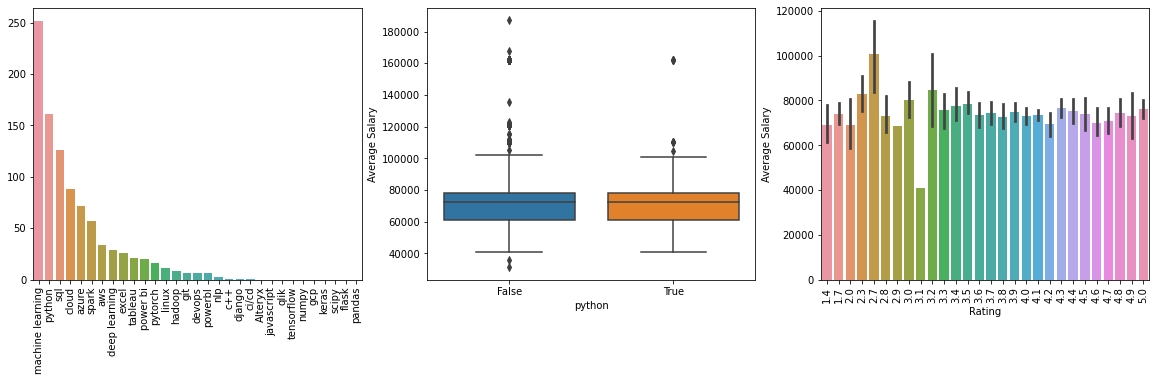

In [73]:
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
data = df[skillswithoutspace].sum().sort_values(ascending=False)
ax = sns.barplot(x=data.index, y=data.values, ax=axs[0])
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
temp = df
temp["python"] = False
temp.loc[temp["Job Description"].str.contains(" python ", case=False, regex=False), "python"] = True
temp["senior"] = False
temp.loc[temp["Job Description"].str.contains(" senior ", case=False, regex=False), "senior"] = True
sns.boxplot(y=temp["Average Salary"], x=temp["python"], ax=axs[1])
ax3 = sns.barplot(x=df["Rating"], y=df["Average Salary"], ax=axs[2])
_ = ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 90)

# Chapter 4
<a id='Chapter-4'></a>

### Feature Engineering

---------------------------------------------------------------------------------

In [274]:
# Count Vectorizer
# Potentially look at dimensionality reduction, PCA
# Standard Scalar
# JK no need to for scaling we will end with a sparse matrix and only our target variable will be unscaled which is fine
# Jk again, forgot about the rating column that we should probably scale

from sklearn.feature_extraction.text import CountVectorizer



# Chapter 5
<a id='Chapter-5'></a>

### Model Training and Hpyer parameter tuning

---------------------------------------------------------------------------------

In [275]:
# we want Lasso/Elastic over RidgeRegression (lots of irrelevant features) / Linear SVR
# Grid Search
# Train Test Split





# Chapter 6
<a id='Chapter-6'></a>

### using a pretrained spacy transformer

---------------------------------------------------------------------------------

In [7]:
import spacy
spacy.require_gpu()
nlp = spacy.load("en_core_web_trf")

In [8]:
test = nlp("Hello my name is dimitri and I like apples.")

In [9]:
for noun in test.noun_chunks:
    print(noun)

my name
dimitri
I
apples


In [10]:
for token in test:
    
    print(token ,token.pos_)

Hello INTJ
my PRON
name NOUN
is AUX
dimitri PROPN
and CCONJ
I PRON
like VERB
apples NOUN
. PUNCT


In [11]:
test.spans

{}